In [1]:
import numpy as np
import landlab
from landlab.plot.imshow import imshow_node_grid
from landlab.io import read_esri_ascii
%matplotlib inline

print "landlab version",landlab.__version__

landlab version 1.0.0-beta.1


In [2]:
(mg, z) = read_esri_ascii(r'C:\\crs\\proj\\2015_Sandwich\\SHOALS_lidar\\sandwich_town_neck.asc', name='elevation')

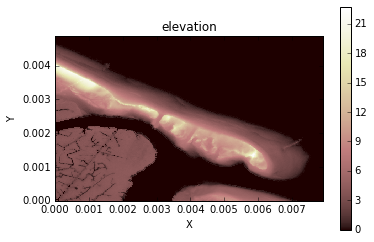

In [3]:
z[z<=-9999.0] = 0.
imshow_node_grid(mg, 'elevation')

In [ ]:
np.shape(z)

# diffuse this landscape
D = 0.01  # m2/yr transport coefficient
dt = 0.2 * mg.dx * mg.dx / D
print dt

In [4]:
# 


speed = 10.
direction = 90.
rtd = 57.29577950
ucomp = speed*np.sin(direction/rtd)
vcomp = speed*np.cos(direction/rtd)
print ucomp,vcomp

2.21490607728e-09
10.0 -3.5865926323e-09


In [13]:
u = mg.add_zeros('link','u_velocity',noclobber=False)
v = mg.add_zeros('link','v_velocity',noclobber=False)

In [15]:
u[mg.horizontal_links]=ucomp
u[mg.vertical_links]=vcomp

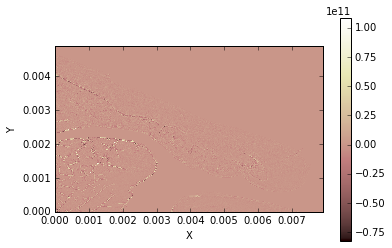

In [21]:
def bagnoldQ(U, Ucrit=0., d=250.e-6):
    """
    Calculate aeolian sand transport rate (kg m-1 s-1)
    Inputs:
       U = wind friction velocity (m/s)
       Ucrit = threshold u*
       d = sand grain size (m)
    """
    g = 9.81    # m s-2
    rhoa = 1.22 # kg m-3
    C = 1.      # []
    D = 250.e-6 # m
    q = np.sign(U)*C*(rhoa/g)*np.sqrt(d/D)*(np.abs(U)-Ucrit)**3 # kg m-1 s-1
    
    
grad = mg.calc_grad_at_link(z)
q+=grad
dqdz = mg.calc_flux_div_at_node(q)
imshow_node_grid(mg,dqdz)


In [ ]:
Be nice to be able to sub-sample a grid
Polar to rect coords
 